In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers


### Data

In [2]:
# read csv into array
result = loadmat('pone.0197134.s005.mat')
#print(result.keys())
Xfilt = result['Xfilt']
nested = Xfilt[0][0]
data = nested[0]
ID = pd.DataFrame(nested[1],columns=["Person No", "Analysis Day"])
numdate = pd.DataFrame(nested[2],columns=["num date"])
setting = pd.DataFrame(nested[3],columns=["setting"])
skin = pd.DataFrame(nested[4],columns=["skin depth"])
yref=pd.DataFrame(nested[5],columns=["Blood Glucose Level"])

axis = nested[6] #IGNORE THIS FOR NOW?
data_pd = pd.DataFrame(data)
df = pd.concat([data_pd], axis=1, join='inner')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,936,937,938,939
0,28488.588429,28446.354009,28453.197483,28431.566580,28390.421470,28385.094026,28405.486160,28423.173802,28370.313383,28337.097669,...,10277.343420,10218.931433,10219.109736,10189.986509,10115.431155,10049.988168,10042.554209,9997.752657,9924.489900,9892.879057
1,24485.070992,24438.051361,24442.241816,24400.657912,24339.445128,24326.187793,24348.309457,24371.991912,24295.754140,24275.646206,...,8164.722983,8141.679397,8115.509742,8082.797939,8061.514937,8017.959100,7989.602353,7931.786194,7890.708607,7877.704101
2,27449.705627,27402.063640,27418.960737,27406.307258,27360.270869,27342.854461,27347.655372,27357.845879,27282.134231,27247.829301,...,9592.417881,9552.301173,9539.294043,9507.357240,9453.238805,9437.983138,9396.550118,9331.997652,9263.431600,9265.080484
3,25310.403076,25240.748716,25230.769763,25235.611984,25192.217383,25172.648989,25172.957930,25185.407709,25106.422232,25074.988294,...,8717.237767,8690.064801,8695.400938,8650.865558,8613.267944,8561.497804,8535.770375,8491.163681,8419.820558,8410.012192
4,29076.981960,29023.136047,29047.456022,29043.876691,28997.829029,28962.259265,28948.511659,29023.955183,28950.548559,28890.461260,...,10333.614834,10297.605235,10268.669938,10229.400973,10187.185278,10112.522427,10093.164470,10059.903431,9954.752237,9999.457235


### Y Data

In [3]:
y_data = pd.DataFrame(yref)
y_data.head()

,Blood Glucose Level
0,14.400000
1,14.100000
2,7.070588
3,8.300000
4,12.700000


In [4]:
df.shape

(4341, 940)

In [5]:
y_data.shape

(4341, 1)

In [6]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))
scaledFeaturesDF = pd.DataFrame(data=scaler.fit_transform(df), columns=df.columns)
#y_data = pd.DataFrame(data=scaler.fit_transform(y_data), columns=y_data.columns)
#y_data.head()

In [7]:
import matplotlib.pyplot as plot


In [8]:
X_train, X_test, y_train, y_test = train_test_split(scaledFeaturesDF, y_data, test_size=0.20)

In [9]:
X_train.shape

(3472, 940)

In [10]:
# Regression Models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Raman Spectroscopy Plotting

##### The normalized plot show more pronounced peaks which may lead to better learning

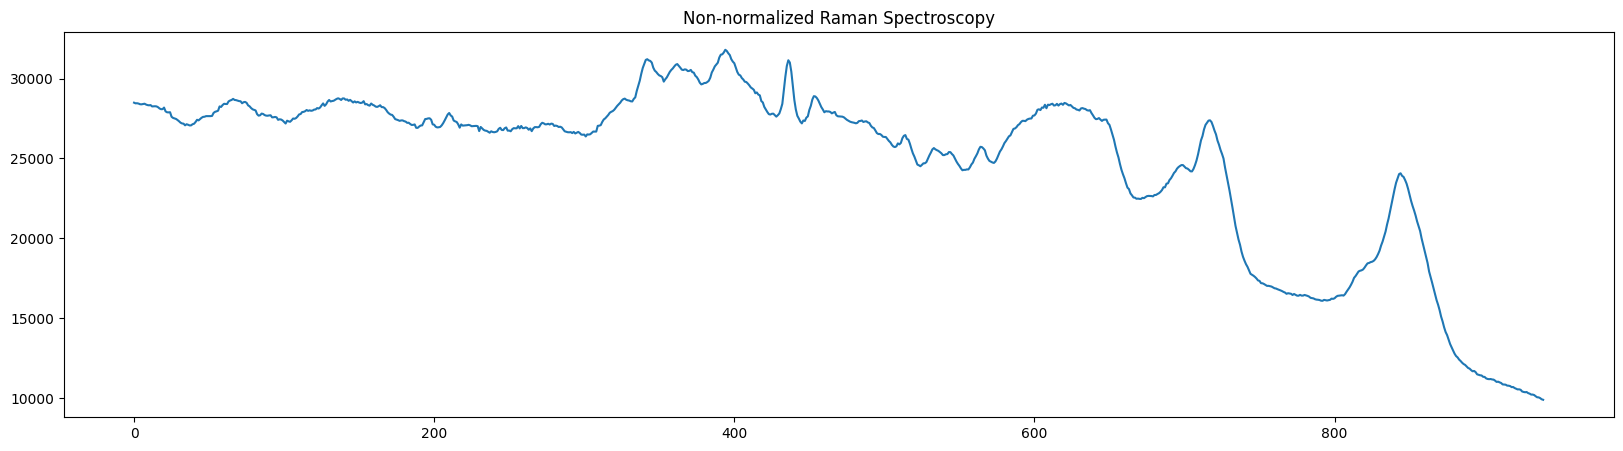

In [11]:
#Non-Normalized Plot
plt.figure(figsize = (20,5))
plt.plot(df.columns, df.iloc[0])
plt.title("Non-normalized Raman Spectroscopy")
plt.show()

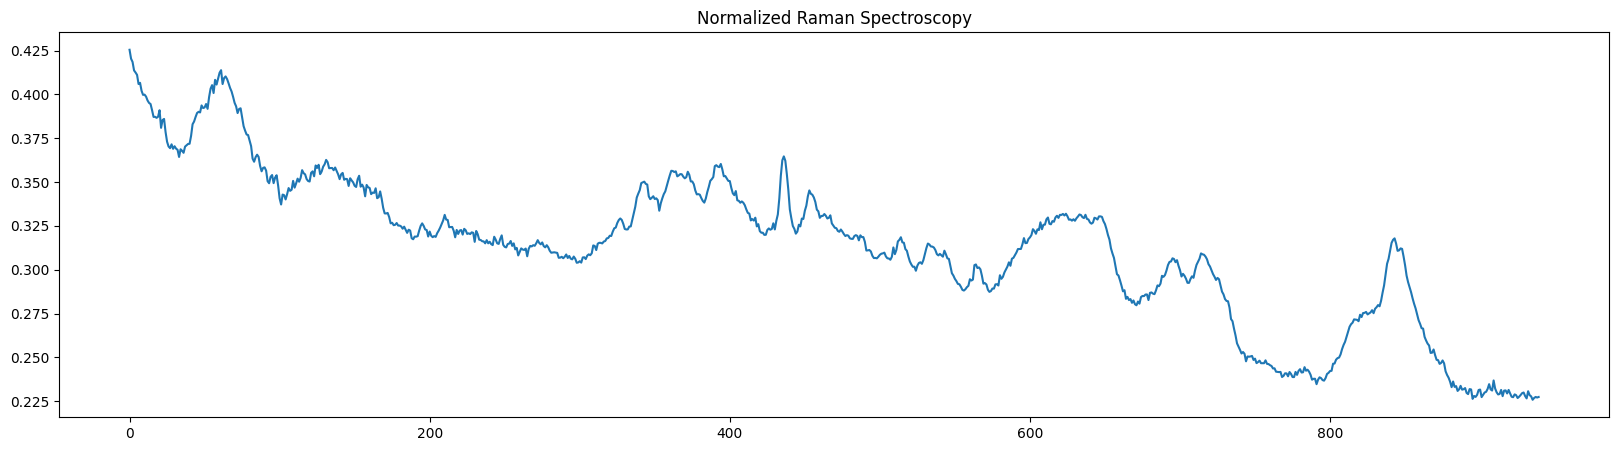

In [12]:
#Normalized Plot
plt.figure(figsize = (20,5)) 
plt.plot(scaledFeaturesDF.columns, scaledFeaturesDF.iloc[0])
plt.title("Normalized Raman Spectroscopy")
plt.show()

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GaussianNoise,Reshape


x = (940,1)
x1 = (940,)


n_timesteps, n_features, n_outputs = X_train.shape[0], X_train.shape[1], y_train.shape[0]



### Research Paper Model
#### 1D-SCNN-EN

In [14]:

paper_model = Sequential()
paper_model.add(Conv1D(filters=20, kernel_size=32, activation='relu', input_shape=x))
paper_model.add(MaxPooling1D(pool_size=4,strides=2, padding='valid'))

paper_model.add(Flatten())

paper_model.add(Dense(32, activation='relu'))
paper_model.add(Dense(1,activation='linear'))

paper_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 909, 20)           660       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 453, 20)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9060)              0         
                                                                 
 dense (Dense)               (None, 32)                289952    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 290,645
Trainable params: 290,645
Non-trainable params: 0
__________________________________________________

In [15]:
paper_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mse','mae','mape'])

In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
paper_model.fit(X_train, y_train, epochs=50000, batch_size=32, verbose=1, validation_split=0.2, callbacks=[callback])

Epoch 1/50000
87/87 [==============================] - 1s 11ms/step - loss: 16.1909 - mse: 16.1909 - mae: 3.1658 - mape: 39.9575 - val_loss: 15.9728 - val_mse: 15.9728 - val_mae: 3.1442 - val_mape: 40.2974
Epoch 2/50000
87/87 [==============================] - 1s 11ms/step - loss: 16.1959 - mse: 16.1959 - mae: 3.1702 - mape: 40.1210 - val_loss: 16.2809 - val_mse: 16.2809 - val_mae: 3.0781 - val_mape: 36.8805
Epoch 3/50000
87/87 [==============================] - 1s 10ms/step - loss: 16.0634 - mse: 16.0634 - mae: 3.1559 - mape: 39.8884 - val_loss: 16.0079 - val_mse: 16.0079 - val_mae: 3.1525 - val_mape: 40.5436
Epoch 4/50000
87/87 [==============================] - 1s 10ms/step - loss: 16.3627 - mse: 16.3627 - mae: 3.1909 - mape: 40.2229 - val_loss: 16.1544 - val_mse: 16.1544 - val_mae: 3.0523 - val_mape: 36.0233
Epoch 5/50000
87/87 [==============================] - 1s 10ms/step - loss: 16.0701 - mse: 16.0701 - mae: 3.1579 - mape: 39.9667 - val_loss: 15.7413 - val_mse: 15.7413 - val_ma

##### To load the 1D-SCNN-EN Model

In [ ]:
#paper_model = tf.keras.models.load_model('saved_model/paper_model_v1')

In [18]:
paper_y_pred = paper_model.predict(X_test)

28/28 [==============================] - 0s 3ms/step


In [19]:
paper_model.evaluate(X_test, y_test, batch_size=32, verbose=0)

[12.342328071594238, 12.342328071594238, 2.728975296020508, 33.675148010253906]

In [20]:
print("MSE:")
print(mean_squared_error(y_test ,paper_y_pred))
print("R-squared:")
print(r2_score(y_test ,paper_y_pred))

MSE:
12.34232901293345
R-squared:
0.24105318861664227


##### Saving a pre-ran model

In [ ]:
#!mkdir -p saved_model
#paper_model.save('saved_model/paper_model_v1')

INFO:tensorflow:Assets written to: saved_model/paper_model_v1\assets


INFO:tensorflow:Assets written to: saved_model/paper_model_v1\assets


#### 1D-SCNN-EN Prediction Plotting 

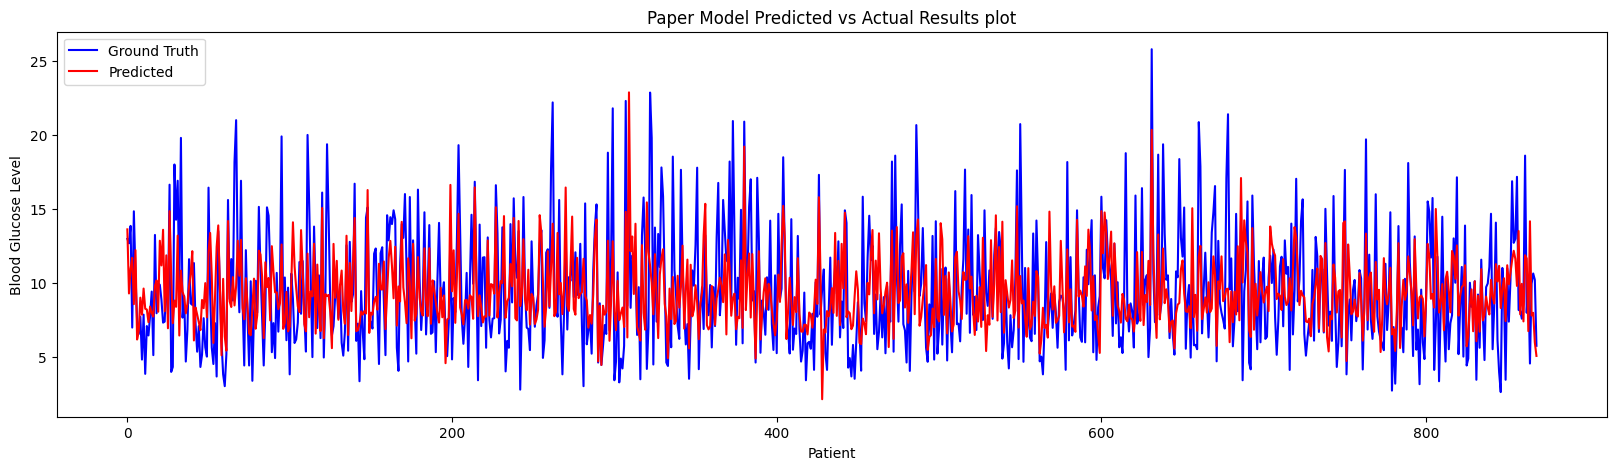

In [21]:
leng = paper_y_pred.shape[0]


rang_len = list(range(0, leng))


plt.figure(figsize = (20,5))
plt.title("Paper Model Predicted vs Actual Results plot")
plt.xlabel("Patient")
plt.ylabel("Blood Glucose Level")
plt.plot(rang_len, y_test["Blood Glucose Level"], color = 'blue', label="Ground Truth")

plt.plot(rang_len, paper_y_pred,color = 'red', label="Predicted")
plt.legend(loc="upper left")
plt.show()

### Deep Learning Model

In [22]:
model = Sequential()

model.add(Conv1D(filters=16, kernel_size=21, activation='relu', input_shape=x))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

model.add(Conv1D(filters=32, kernel_size=11, activation='relu'))
model.add(MaxPooling1D(pool_size=2,strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='linear'))


In [23]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mse','mae','mape'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 920, 16)           352       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 460, 16)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 450, 32)           5664      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 225, 32)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [24]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
model.fit(X_train, y_train, epochs=50000, batch_size=32, verbose=1, validation_split=0.2, callbacks=[callback])

Epoch 1/50000
87/87 [==============================] - 3s 22ms/step - loss: 32.9443 - mse: 32.9443 - mae: 4.4423 - mape: 50.9449 - val_loss: 17.3797 - val_mse: 17.3797 - val_mae: 3.1180 - val_mape: 35.0383
Epoch 2/50000
87/87 [==============================] - 2s 20ms/step - loss: 18.4831 - mse: 18.4831 - mae: 3.4343 - mape: 42.9697 - val_loss: 17.5428 - val_mse: 17.5428 - val_mae: 3.1033 - val_mape: 34.0121
Epoch 3/50000
87/87 [==============================] - 2s 19ms/step - loss: 17.8228 - mse: 17.8228 - mae: 3.3682 - mape: 42.6390 - val_loss: 16.4646 - val_mse: 16.4646 - val_mae: 3.1681 - val_mape: 39.1943
Epoch 4/50000
87/87 [==============================] - 2s 19ms/step - loss: 17.9030 - mse: 17.9030 - mae: 3.3774 - mape: 42.7208 - val_loss: 16.5428 - val_mse: 16.5428 - val_mae: 3.1321 - val_mape: 37.7253
Epoch 5/50000
87/87 [==============================] - 2s 19ms/step - loss: 17.6876 - mse: 17.6876 - mae: 3.3545 - mape: 42.4564 - val_loss: 16.5247 - val_mse: 16.5247 - val_ma

##### Save pre-ran model

In [ ]:
#paper_model.save('saved_model/model_v1')

INFO:tensorflow:Assets written to: saved_model/model_v1\assets


INFO:tensorflow:Assets written to: saved_model/model_v1\assets


In [25]:
DNN_y_pred = model.predict(X_test)


28/28 [==============================] - 0s 4ms/step


In [26]:
model.evaluate(X_test, y_test, batch_size=32, verbose=0)

[11.596830368041992, 11.596830368041992, 2.580343723297119, 30.60796356201172]

In [27]:
print("MSE: ")
print(mean_squared_error(y_test ,DNN_y_pred))
print("R-squared: ")
print(r2_score(y_test ,DNN_y_pred))

MSE: 
11.596830842077521
R-squared: 
0.28689489799502144


#### Deep Learning Model Prediction Plot

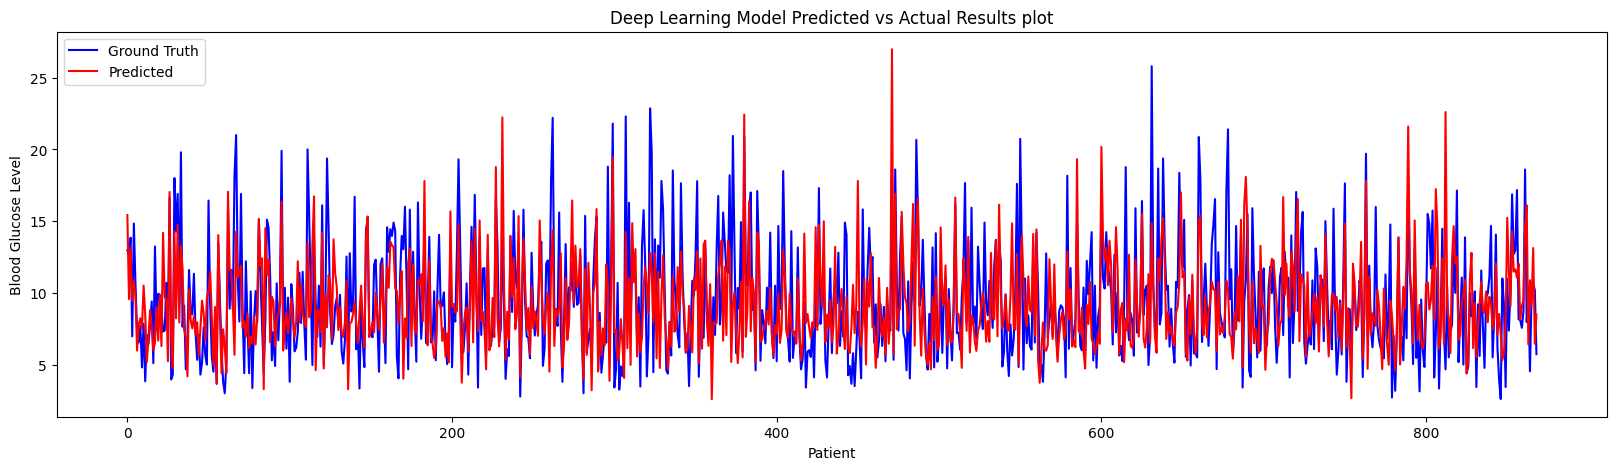

In [28]:
leng = DNN_y_pred.shape[0]


rang_len = list(range(0, leng))


plt.figure(figsize = (20,5))
plt.title("Deep Learning Model Predicted vs Actual Results plot")
plt.xlabel("Patient")
plt.ylabel("Blood Glucose Level")
plt.plot(rang_len, y_test["Blood Glucose Level"], color = 'blue', label="Ground Truth")
plt.plot(rang_len, DNN_y_pred,color = 'red', label="Predicted")
plt.legend(loc="upper left")

plt.show()